In [196]:
import pandas as pd
import numpy as np
import os
import glob
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [239]:
file_list = os.listdir()[1:-3]

In [240]:
file_list

['01_2016.6월.csv',
 '02_2016.9월.csv',
 '03_2016_수능.csv',
 '04_2017.6월.csv',
 '05_2017.9월.csv',
 '06_2017_수능.csv',
 '07_2018.6월.csv',
 '08_2018.9월.csv',
 '09_2018_수능.csv',
 '10_2019.6월.csv',
 '11_2019.9월.csv',
 '12_2019_수능.csv',
 '13_2020.6월.csv',
 '14_2020.9월.csv',
 '15_2020_수능.csv',
 '16_2021.6월.csv',
 '17_2021.9월.csv']

In [245]:
result = np.array([])
all_corpus=[]
word_token=0
stacked_token = 0
stacked_nosame = []
all_stacked_token = []
all_stacked_len = 0
stacked_stop_token = 0
word_token_len = []
all_stop_stacked_token = []
all_stop_stacked_nosame = []
stop_words = set(stopwords.words('english')) 

for file in file_list :
    if file[0][-6:-4] == "6월":
        df = pd.read_csv(file,header=None)
    else :
        df = pd.read_csv(file)
    df=df.dropna()
    df.columns = ["number","contents"]
    df_word = df
    
    
    for i in range(len(df)):
        df_word["contents"][i]=re.sub("[①-⑤]\s","",df_word["contents"][i])
        df_word["contents"][i]=re.sub("[^a-zA-Z0-9]"," ",df_word["contents"][i])
    #---------------------------------------------------------------------------
    
    sent_corpus = [sent_tokenize(s) for s in df_word["contents"]]
    
    corpus=[]
    for i in sent_corpus:
        corpus=sent_corpus+i
    
    #토큰수
    temp = 0
    for i in range(len(corpus)):
        temp=temp+len(word_tokenize(corpus[i][0]))
    word_token_len.append(temp)
    word_token = temp
    
        #누적토큰수
    stacked_token = sum(word_token_len)
    
    for i in sent_corpus:
        all_corpus=all_corpus+i
        
    #누적토큰수 중복제거
    temp = []
    for i in range(len(all_corpus)):
        temp=temp+((word_tokenize(all_corpus[i])))

    stacked_nosame = stacked_nosame + temp
    t=len(pd.Series(np.array(stacked_nosame)).unique())
    all_stacked_len = t
    
    #토큰수 불용어 제외
    stop_result = []
    for i in range(len(corpus)):
        for w in word_tokenize(corpus[i][0]):
            if w not in stop_words: 
                stop_result.append(w)       
    stop_token=(len(stop_result))
    
    
    #누적 토큰수 불용어 제외
    
    all_stop_stacked_token.append((stop_token))
    all_stop_stacked_len = sum(all_stop_stacked_token)
    
    #누적토큰수 중복값, 불용어 제외
    stop_result = []
    for i in range(len(all_corpus)):
        for w in word_tokenize(all_corpus[i]): 
            if w not in stop_words: 
                stop_result.append(w)       
 
    all_stop_stacked_nosame  = all_stop_stacked_nosame + stop_result
    tt=len(pd.Series(np.array(all_stop_stacked_nosame)).unique())
                    
    all_stop_token=tt
    
    result=np.append(result, np.array([[word_token, stacked_token, all_stacked_len, stop_token, all_stop_stacked_len, all_stop_token]]))
    
        

<ipython-input-245-8439a5d60cd1>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_word["contents"][i]=re.sub("[^a-zA-Z0-9]"," ",df_word["contents"][i])
<ipython-input-245-8439a5d60cd1>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_word["contents"][i]=re.sub("[①-⑤]\s","",df_word["contents"][i])
<ipython-input-245-8439a5d60cd1>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_word["contents"][i]=re.sub("[①-⑤]\s","",df_word

In [246]:
data = pd.DataFrame(data=result.reshape(17,6).T,columns=file_list)

In [247]:
data

,01_2016.6월.csv,02_2016.9월.csv,03_2016_수능.csv,04_2017.6월.csv,05_2017.9월.csv,06_2017_수능.csv,07_2018.6월.csv,08_2018.9월.csv,09_2018_수능.csv,10_2019.6월.csv,11_2019.9월.csv,12_2019_수능.csv,13_2020.6월.csv,14_2020.9월.csv,15_2020_수능.csv,16_2021.6월.csv,17_2021.9월.csv
0,3651.0,3916.0,3544.0,3727.0,3809.0,3749.0,3745.0,3907.0,3798.0,3688.0,3868.0,3824.0,3773.0,3987.0,3914.0,3800.0,3804.0
1,3651.0,7567.0,11111.0,14838.0,18647.0,22396.0,26141.0,30048.0,33846.0,37534.0,41402.0,45226.0,48999.0,52986.0,56900.0,60700.0,64504.0
2,1415.0,2354.0,3123.0,3769.0,4338.0,4890.0,5399.0,5865.0,6318.0,6711.0,7096.0,7479.0,7828.0,8149.0,8459.0,8763.0,9062.0
3,2068.0,2183.0,2044.0,2143.0,2126.0,2135.0,2162.0,2245.0,2229.0,2079.0,2130.0,2201.0,2198.0,2237.0,2180.0,2155.0,2234.0
4,2068.0,4251.0,6295.0,8438.0,10564.0,12699.0,14861.0,17106.0,19335.0,21414.0,23544.0,25745.0,27943.0,30180.0,32360.0,34515.0,36749.0
5,1302.0,2227.0,2992.0,3636.0,4204.0,4753.0,5262.0,5728.0,6180.0,6573.0,6958.0,7340.0,7689.0,8009.0,8319.0,8623.0,8921.0


## A~F까지 끝냈음

In [252]:
result = np.array([])
all_corpus=[]
word_token=0
stacked_token = 0
all_stacked_token = []
all_stacked_len = 0
stacked_stop_token = 0
word_token_len = []
all_stop_stacked_token = []
stop_words = set(stopwords.words('english')) 

for file in file_list :
    if file[0][-6:-4] == "6월":
        df = pd.read_csv(file,header=None)
    else :
        df = pd.read_csv(file)
        
    df=df.dropna()
    df.columns = ["number","contents"]
    df_word = df
    
    
    for i in range(len(df)):
        df_word["contents"][i]=re.sub("[①-⑤]\s","",df_word["contents"][i])
        df_word["contents"][i]=re.sub("[^a-zA-Z0-9]"," ",df_word["contents"][i])
        
    df_2021 = pd.read_csv("18_2021_수능.csv")
    for i in range(len(df_2021)):
        df_2021["contents"][i]=re.sub("[①-⑤]\s","",df_2021["contents"][i])
        df_2021["contents"][i]=re.sub("[^a-zA-Z0-9]"," ",df_2021["contents"][i])
    #---------------------------------------------------------------------------
    
    
    sent_corpus = [sent_tokenize(s) for s in df_word["contents"]]
    corpus=[]
    for i in sent_corpus:
        corpus=sent_corpus+i
    
    sent_corpus_21 = [sent_tokenize(s) for s in df_2021["contents"]]
    corpus_21=[]
    for i in sent_corpus_21:
        corpus_21=sent_corpus_21+i
        
        
    
       #토큰수 불용어 제외
    stop_result_21 = []
    for i in range(len(corpus_21)):
        for w in word_tokenize(corpus_21[i][0]):
            if w not in stop_words: 
                stop_result_21.append(w)           

    stop_result = []
    for i in range(len(corpus)):
        for w in word_tokenize(corpus[i][0]):
            if w not in stop_words: 
                stop_result.append(w)       
    
    same_num=0
    for i in stop_result_21:
        if i in stop_result:
            same_num=same_num+1
    
    
    for i in sent_corpus:
        all_corpus=all_corpus+i
    
    #누적 토큰수 불용어 제외
    
    
    #누적토큰수 중복값, 불용어 제외
    stop_result = []
    for i in range(len(all_corpus)):
        for w in word_tokenize(all_corpus[i]): 
            if w not in stop_words: 
                stop_result.append(w)       
    
    tt=pd.Series(np.array(stop_result)).unique()
    
    all_same_num=0
    for i in stop_result_21:
        if i in tt:
            all_same_num=all_same_num+1
    
    result=np.append(result, np.array([[same_num,len(stop_result_21)-same_num,same_num/len(stop_result_21)*100,all_same_num,len(stop_result_21)-all_same_num,all_same_num/len(stop_result_21)*100]]))

<ipython-input-252-eedfa881a77b>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_word["contents"][i]=re.sub("[^a-zA-Z0-9]"," ",df_word["contents"][i])
<ipython-input-252-eedfa881a77b>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_word["contents"][i]=re.sub("[①-⑤]\s","",df_word["contents"][i])
<ipython-input-252-eedfa881a77b>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021["contents"][i]=re.sub("[①-⑤]\s","",df_2021

1302
2067
2227
4249


<ipython-input-252-eedfa881a77b>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_word["contents"][i]=re.sub("[①-⑤]\s","",df_word["contents"][i])
<ipython-input-252-eedfa881a77b>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_word["contents"][i]=re.sub("[^a-zA-Z0-9]"," ",df_word["contents"][i])
<ipython-input-252-eedfa881a77b>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021["contents"][i]=re.sub("[①-⑤]\s","",df_2021

2992
6292
3636
8434


<ipython-input-252-eedfa881a77b>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_word["contents"][i]=re.sub("[①-⑤]\s","",df_word["contents"][i])
<ipython-input-252-eedfa881a77b>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_word["contents"][i]=re.sub("[^a-zA-Z0-9]"," ",df_word["contents"][i])
<ipython-input-252-eedfa881a77b>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021["contents"][i]=re.sub("[①-⑤]\s","",df_2021

4204
10559
4753
12693


<ipython-input-252-eedfa881a77b>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_word["contents"][i]=re.sub("[①-⑤]\s","",df_word["contents"][i])
<ipython-input-252-eedfa881a77b>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_word["contents"][i]=re.sub("[^a-zA-Z0-9]"," ",df_word["contents"][i])
<ipython-input-252-eedfa881a77b>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021["contents"][i]=re.sub("[①-⑤]\s","",df_2021

5262
14854


<ipython-input-252-eedfa881a77b>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_word["contents"][i]=re.sub("[①-⑤]\s","",df_word["contents"][i])
<ipython-input-252-eedfa881a77b>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_word["contents"][i]=re.sub("[^a-zA-Z0-9]"," ",df_word["contents"][i])
<ipython-input-252-eedfa881a77b>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021["contents"][i]=re.sub("[①-⑤]\s","",df_2021

5728
17098


<ipython-input-252-eedfa881a77b>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_word["contents"][i]=re.sub("[①-⑤]\s","",df_word["contents"][i])
<ipython-input-252-eedfa881a77b>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_word["contents"][i]=re.sub("[^a-zA-Z0-9]"," ",df_word["contents"][i])
<ipython-input-252-eedfa881a77b>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021["contents"][i]=re.sub("[①-⑤]\s","",df_2021

6180
19326


<ipython-input-252-eedfa881a77b>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_word["contents"][i]=re.sub("[^a-zA-Z0-9]"," ",df_word["contents"][i])
<ipython-input-252-eedfa881a77b>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_word["contents"][i]=re.sub("[①-⑤]\s","",df_word["contents"][i])
<ipython-input-252-eedfa881a77b>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021["contents"][i]=re.sub("[①-⑤]\s","",df_2021

6573
21404


<ipython-input-252-eedfa881a77b>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_word["contents"][i]=re.sub("[①-⑤]\s","",df_word["contents"][i])
<ipython-input-252-eedfa881a77b>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_word["contents"][i]=re.sub("[^a-zA-Z0-9]"," ",df_word["contents"][i])
<ipython-input-252-eedfa881a77b>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021["contents"][i]=re.sub("[①-⑤]\s","",df_2021

6958
23533


<ipython-input-252-eedfa881a77b>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_word["contents"][i]=re.sub("[①-⑤]\s","",df_word["contents"][i])
<ipython-input-252-eedfa881a77b>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_word["contents"][i]=re.sub("[^a-zA-Z0-9]"," ",df_word["contents"][i])
<ipython-input-252-eedfa881a77b>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021["contents"][i]=re.sub("[①-⑤]\s","",df_2021

7340
25733


<ipython-input-252-eedfa881a77b>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_word["contents"][i]=re.sub("[^a-zA-Z0-9]"," ",df_word["contents"][i])
<ipython-input-252-eedfa881a77b>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_word["contents"][i]=re.sub("[①-⑤]\s","",df_word["contents"][i])
<ipython-input-252-eedfa881a77b>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021["contents"][i]=re.sub("[①-⑤]\s","",df_2021

7689
27931


<ipython-input-252-eedfa881a77b>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_word["contents"][i]=re.sub("[①-⑤]\s","",df_word["contents"][i])
<ipython-input-252-eedfa881a77b>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_word["contents"][i]=re.sub("[^a-zA-Z0-9]"," ",df_word["contents"][i])
<ipython-input-252-eedfa881a77b>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021["contents"][i]=re.sub("[①-⑤]\s","",df_2021

8009
30167


<ipython-input-252-eedfa881a77b>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_word["contents"][i]=re.sub("[①-⑤]\s","",df_word["contents"][i])
<ipython-input-252-eedfa881a77b>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_word["contents"][i]=re.sub("[^a-zA-Z0-9]"," ",df_word["contents"][i])
<ipython-input-252-eedfa881a77b>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021["contents"][i]=re.sub("[①-⑤]\s","",df_2021

8319
32346


<ipython-input-252-eedfa881a77b>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_word["contents"][i]=re.sub("[^a-zA-Z0-9]"," ",df_word["contents"][i])
<ipython-input-252-eedfa881a77b>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_word["contents"][i]=re.sub("[①-⑤]\s","",df_word["contents"][i])
<ipython-input-252-eedfa881a77b>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021["contents"][i]=re.sub("[①-⑤]\s","",df_2021

8623
34500


<ipython-input-252-eedfa881a77b>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_word["contents"][i]=re.sub("[①-⑤]\s","",df_word["contents"][i])
<ipython-input-252-eedfa881a77b>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_word["contents"][i]=re.sub("[^a-zA-Z0-9]"," ",df_word["contents"][i])
<ipython-input-252-eedfa881a77b>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021["contents"][i]=re.sub("[①-⑤]\s","",df_2021

8921
36733


In [253]:
result

array([ 771.        , 1466.        ,   34.46580241,  771.        ,
       1466.        ,   34.46580241,  839.        , 1398.        ,
         37.50558784, 1081.        , 1156.        ,   48.32364774,
        845.        , 1392.        ,   37.7738042 , 1251.        ,
        986.        ,   55.92311131,  858.        , 1379.        ,
         38.35493965, 1405.        ,  832.        ,   62.80733125,
        882.        , 1355.        ,   39.4278051 , 1517.        ,
        720.        ,   67.81403666,  799.        , 1438.        ,
         35.71747877, 1583.        ,  654.        ,   70.76441663,
        860.        , 1377.        ,   38.44434511, 1643.        ,
        594.        ,   73.44658024,  877.        , 1360.        ,
         39.20429146, 1691.        ,  546.        ,   75.59231113,
        887.        , 1350.        ,   39.65131873, 1722.        ,
        515.        ,   76.97809566,  810.        , 1427.        ,
         36.20920876, 1746.        ,  491.        ,   78.05096

In [254]:
data2 = pd.DataFrame(data=result.reshape(17,6).T,columns=file_list)

In [255]:
data2

,01_2016.6월.csv,02_2016.9월.csv,03_2016_수능.csv,04_2017.6월.csv,05_2017.9월.csv,06_2017_수능.csv,07_2018.6월.csv,08_2018.9월.csv,09_2018_수능.csv,10_2019.6월.csv,11_2019.9월.csv,12_2019_수능.csv,13_2020.6월.csv,14_2020.9월.csv,15_2020_수능.csv,16_2021.6월.csv,17_2021.9월.csv
0,771.000000,839.000000,845.000000,858.000000,882.000000,799.000000,860.000000,877.000000,887.000000,810.000000,858.000000,913.000000,862.000000,883.000000,891.000000,806.000000,921.000000
1,1466.000000,1398.000000,1392.000000,1379.000000,1355.000000,1438.000000,1377.000000,1360.000000,1350.000000,1427.000000,1379.000000,1324.000000,1375.000000,1354.000000,1346.000000,1431.000000,1316.000000
2,34.465802,37.505588,37.773804,38.354940,39.427805,35.717479,38.444345,39.204291,39.651319,36.209209,38.354940,40.813590,38.533751,39.472508,39.830130,36.030398,41.171211
3,771.000000,1081.000000,1251.000000,1405.000000,1517.000000,1583.000000,1643.000000,1691.000000,1722.000000,1746.000000,1769.000000,1789.000000,1810.000000,1828.000000,1849.000000,1874.000000,1891.000000
4,1466.000000,1156.000000,986.000000,832.000000,720.000000,654.000000,594.000000,546.000000,515.000000,491.000000,468.000000,448.000000,427.000000,409.000000,388.000000,363.000000,346.000000
5,34.465802,48.323648,55.923111,62.807331,67.814037,70.764417,73.446580,75.592311,76.978096,78.050961,79.079124,79.973178,80.911936,81.716585,82.655342,83.772910,84.532857


In [35]:
data

,01_2016.6월.csv,02_2016.9월.csv,03_2016_수능.csv,04_2017.6월.csv,05_2017.9월.csv,06_2017_수능.csv,07_2018.6월.csv,08_2018.9월.csv,09_2018_수능.csv,10_2019.6월.csv,11_2019.9월.csv,12_2019_수능.csv,13_2020.6월.csv,14_2020.9월.csv,15_2020_수능.csv,16_2021.6월.csv,17_2021.9월.csv
0,3651.0,3916.0,3544.0,3727.0,3809.0,3749.0,3745.0,3907.0,3798.0,3688.0,3868.0,3824.0,3773.0,3987.0,3914.0,3800.0,3804.0
1,3651.0,7567.0,11111.0,14838.0,18647.0,22396.0,26141.0,30048.0,33846.0,37534.0,41402.0,45226.0,48999.0,52986.0,56900.0,60700.0,64504.0
2,21.0,65.0,132.0,221.0,333.0,468.0,624.0,802.0,1002.0,1224.0,1469.0,1737.0,2026.0,2337.0,2671.0,3027.0,3406.0
3,2068.0,2183.0,2044.0,2143.0,2126.0,2135.0,2162.0,2245.0,2229.0,2079.0,2130.0,2201.0,2198.0,2237.0,2180.0,2155.0,2234.0
4,2068.0,4251.0,6295.0,8438.0,10564.0,12699.0,14861.0,17106.0,19335.0,21414.0,23544.0,25745.0,27943.0,30180.0,32360.0,34515.0,36749.0
5,21.0,44.0,67.0,89.0,112.0,135.0,156.0,178.0,200.0,222.0,245.0,268.0,289.0,311.0,334.0,356.0,379.0


In [256]:
out_data = pd.concat([data,data2])

In [257]:
col=[i[3:10] for i in file_list]

In [292]:
out_data.columns = col

In [293]:
out_data=out_data.reset_index(drop=True)

In [294]:
out_data.to_csv("token_result.csv",index=False,encoding="cp949")

In [295]:
out_data

,2016.6월,2016.9월,2016_수능,2017.6월,2017.9월,2017_수능,2018.6월,2018.9월,2018_수능,2019.6월,2019.9월,2019_수능,2020.6월,2020.9월,2020_수능,2021.6월,2021.9월
0,3651.000000,3916.000000,3544.000000,3727.000000,3809.000000,3749.000000,3745.000000,3907.000000,3798.000000,3688.000000,3868.000000,3824.000000,3773.000000,3987.000000,3914.000000,3800.000000,3804.000000
1,3651.000000,7567.000000,11111.000000,14838.000000,18647.000000,22396.000000,26141.000000,30048.000000,33846.000000,37534.000000,41402.000000,45226.000000,48999.000000,52986.000000,56900.000000,60700.000000,64504.000000
2,1415.000000,2354.000000,3123.000000,3769.000000,4338.000000,4890.000000,5399.000000,5865.000000,6318.000000,6711.000000,7096.000000,7479.000000,7828.000000,8149.000000,8459.000000,8763.000000,9062.000000
3,2068.000000,2183.000000,2044.000000,2143.000000,2126.000000,2135.000000,2162.000000,2245.000000,2229.000000,2079.000000,2130.000000,2201.000000,2198.000000,2237.000000,2180.000000,2155.000000,2234.000000
4,2068.000000,4251.000000,6295.000000,8438.000000,10564.000000,12699.000000,14861.000000,17106.000000,19335.000000,21414.000000,23544.000000,25745.000000,27943.000000,30180.000000,32360.000000,34515.000000,36749.000000
5,1302.000000,2227.000000,2992.000000,3636.000000,4204.000000,4753.000000,5262.000000,5728.000000,6180.000000,6573.000000,6958.000000,7340.000000,7689.000000,8009.000000,8319.000000,8623.000000,8921.000000
6,771.000000,839.000000,845.000000,858.000000,882.000000,799.000000,860.000000,877.000000,887.000000,810.000000,858.000000,913.000000,862.000000,883.000000,891.000000,806.000000,921.000000
7,1466.000000,1398.000000,1392.000000,1379.000000,1355.000000,1438.000000,1377.000000,1360.000000,1350.000000,1427.000000,1379.000000,1324.000000,1375.000000,1354.000000,1346.000000,1431.000000,1316.000000
8,34.465802,37.505588,37.773804,38.354940,39.427805,35.717479,38.444345,39.204291,39.651319,36.209209,38.354940,40.813590,38.533751,39.472508,39.830130,36.030398,41.171211
9,771.000000,1081.000000,1251.000000,1405.000000,1517.000000,1583.000000,1643.000000,1691.000000,1722.000000,1746.000000,1769.000000,1789.000000,1810.000000,1828.000000,1849.000000,1874.000000,1891.000000


A,D(0,3) | BC(1,2)

In [167]:
sns.set_palette("muted")

In [86]:
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

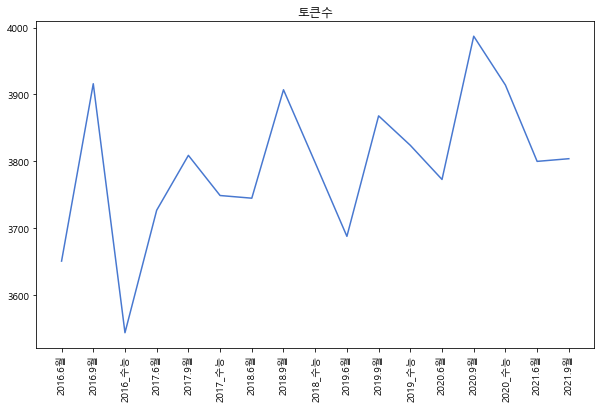

In [296]:
plt.figure(figsize=(10,6))
plt.plot(out_data.iloc[0,:])
plt.title("토큰수")
plt.xticks(rotation=90)
plt.savefig('word_tokens.png')

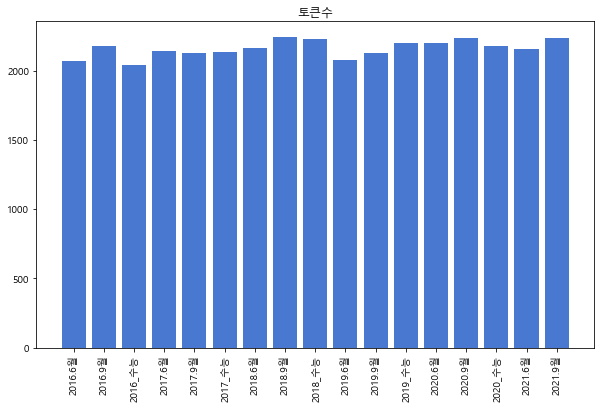

In [297]:
plt.figure(figsize=(10,6))
plt.bar(out_data.columns,out_data.iloc[3,:])
plt.title("토큰수")
plt.xticks(rotation=90)
plt.savefig('word_tokens_2.png')

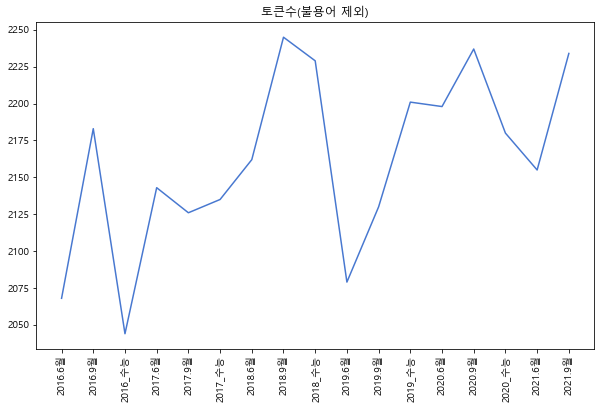

In [298]:
plt.figure(figsize=(10,6))
plt.plot(out_data.columns,out_data.iloc[3,:])
plt.title("토큰수(불용어 제외)")
plt.xticks(rotation=90)
plt.savefig('word_tokens_stop.png')

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


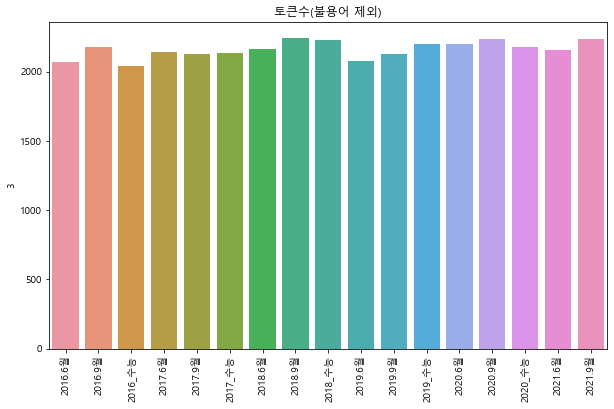

In [299]:
plt.figure(figsize=(10,6))
sns.barplot(out_data.columns,out_data.iloc[3,:])
plt.title("토큰수(불용어 제외)")
plt.xticks(rotation=90)
plt.savefig('word_tokens_stop_2.png')

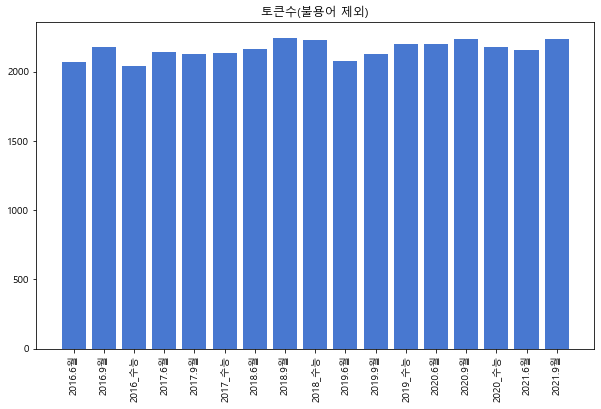

In [300]:
plt.figure(figsize=(10,6))
plt.bar(out_data.columns,out_data.iloc[3,:])
plt.title("토큰수(불용어 제외)")
plt.xticks(rotation=90)
plt.savefig('word_tokens_stop_3.png')

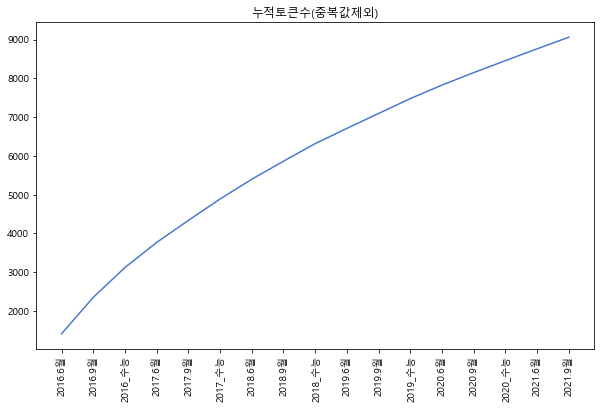

In [301]:
plt.figure(figsize=(10,6))
plt.plot(out_data.columns,out_data.iloc[2,:])
plt.xticks(rotation=90)
plt.title("누적토큰수(중복값제외)")
plt.savefig('stacked_word_tokens_nosame.png')

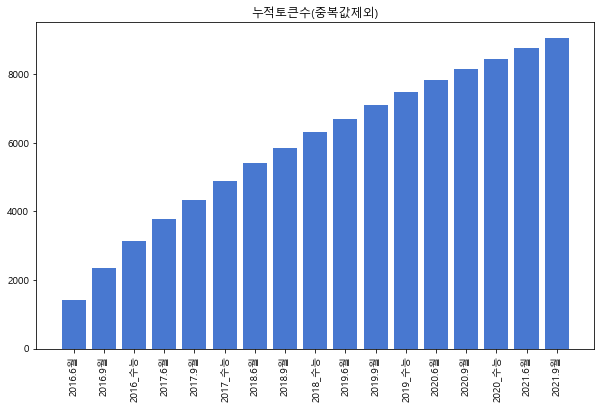

In [302]:
plt.figure(figsize=(10,6))
plt.bar(out_data.columns,out_data.iloc[2,:])
plt.xticks(rotation=90)
plt.title("누적토큰수(중복값제외)")
plt.savefig('stacked_word_tokens_nosame_1.png')

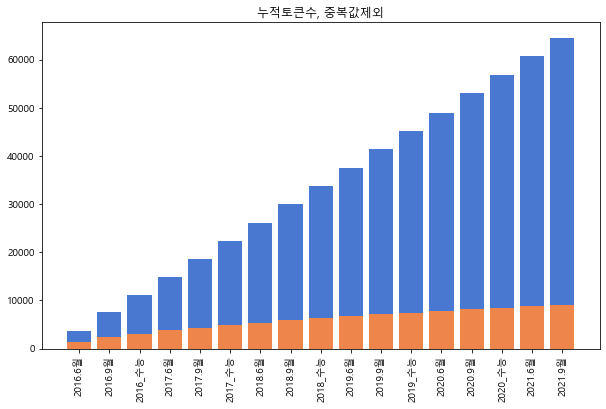

In [303]:
plt.figure(figsize=(10,6))
plt.bar(out_data.columns,out_data.iloc[1,:])
plt.bar(out_data.columns,out_data.iloc[2,:])
plt.xticks(rotation=90)
plt.title("누적토큰수, 중복값제외")
plt.savefig('stacked_word_tokens_nosame_2.png')

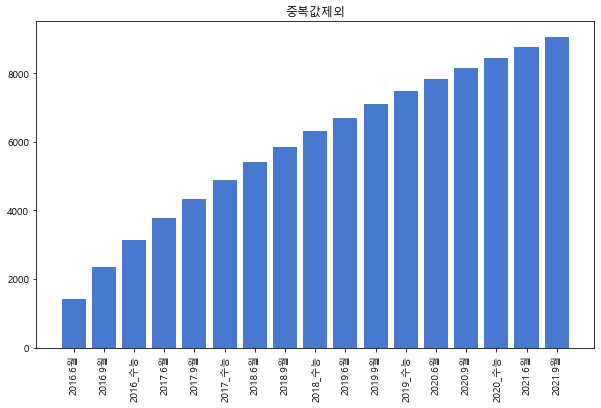

In [304]:
plt.figure(figsize=(10,6))
plt.bar(out_data.columns,out_data.iloc[2,:])
plt.xticks(rotation=90)
plt.title("중복값제외")
plt.savefig('stacked_word_tokens_nosame_3.png')

In [287]:
result = np.array([])
all_corpus=[]
word_token=0
stacked_token = 0
all_stacked_token = []
all_stacked_len = 0
stacked_stop_token = 0
word_token_len = []
all_stop_stacked_token = []
stop_words = set(stopwords.words('english')) 
temp=[]
sent_count=0
for file in file_list :
    if file[0][-6:-4] == "6월":
        df = pd.read_csv(file,header=None)
    else :
        df = pd.read_csv(file)
    print(file)
    df=df.dropna()
    df.columns = ["number","contents"]
    df_word = df
    
    
    for i in range(len(df)):
        df_word["contents"][i]=re.sub("[①-⑤]\s","",df_word["contents"][i])
        df_word["contents"][i]=re.sub("[^a-zA-Z0-9]"," ",df_word["contents"][i])
        
    df_2021 = pd.read_csv("18_2021_수능.csv")
    for i in range(len(df_2021)):
        df_2021["contents"][i]=re.sub("[①-⑤]\s","",df_2021["contents"][i])
        df_2021["contents"][i]=re.sub("[^a-zA-Z0-9]"," ",df_2021["contents"][i])
    #---------------------------------------------------------------------------
    
    
    sent_corpus = [sent_tokenize(s) for s in df_word["contents"]]
    
    temp=temp+sent_corpus
    
    for i in sent_corpus:
        if i not in temp:
            sent_count=sent_count+1
    
    result=np.append(result, np.array([[len(sent_corpus),len(temp),sent_count]]))
    

01_2016.6월.csv
02_2016.9월.csv
03_2016_수능.csv
04_2017.6월.csv
05_2017.9월.csv
06_2017_수능.csv
07_2018.6월.csv
08_2018.9월.csv
09_2018_수능.csv
10_2019.6월.csv
11_2019.9월.csv
12_2019_수능.csv
13_2020.6월.csv
14_2020.9월.csv
15_2020_수능.csv
16_2021.6월.csv
17_2021.9월.csv


<ipython-input-287-33afb9a5ad42>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_word["contents"][i]=re.sub("[^a-zA-Z0-9]"," ",df_word["contents"][i])
<ipython-input-287-33afb9a5ad42>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_word["contents"][i]=re.sub("[①-⑤]\s","",df_word["contents"][i])
<ipython-input-287-33afb9a5ad42>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021["contents"][i]=re.sub("[①-⑤]\s","",df_2021

In [285]:
result

array([ 22.,  22.,   0.,  23.,  45.,   0.,  23.,  68.,   0.,  22.,  90.,
         0.,  23., 113.,   0.,  23., 136.,   0.,  22., 158.,   0.,  23.,
       181.,   0.,  23., 204.,   0.,  22., 226.,   0.,  23., 249.,   0.,
        23., 272.,   0.,  22., 294.,   0.,  23., 317.,   0.,  23., 340.,
         0.,  22., 362.,   0.,  23., 385.,   0.])

In [288]:
data3 = pd.DataFrame(data=result.reshape(17,3).T,columns=col)

In [290]:
data3.to_csv("sent_result.csv",index=False, encoding="cp949")

In [341]:
result = np.array([])
stop_words = set(stopwords.words('english')) 
temp=[]
all_corpus=[]
for file in file_list :
    if file[0][-6:-4] == "6월":
        df = pd.read_csv(file,header=None)
    else :
        df = pd.read_csv(file)
    df=df.dropna()
    df.columns = ["number","contents"]
    df_word = df
    
    
    for i in range(len(df)):
        df_word["contents"][i]=re.sub("[①-⑤]\s","",df_word["contents"][i])
        df_word["contents"][i]=re.sub("[^a-zA-Z0-9]"," ",df_word["contents"][i])
        
    df_2021 = pd.read_csv("18_2021_수능.csv")
    for i in range(len(df_2021)):
        df_2021["contents"][i]=re.sub("[①-⑤]\s","",df_2021["contents"][i])
        df_2021["contents"][i]=re.sub("[^a-zA-Z0-9']"," ",df_2021["contents"][i])
    #---------------------------------------------------------------------------
    
    
    sent_corpus = [sent_tokenize(s) for s in df_word["contents"]]
    
    temp=temp+sent_corpus
    
    for i in sent_corpus:
        all_corpus=all_corpus+i
    
    #result=np.append(result, np.array([[len(sent_corpus),len(temp),sent_count]]))
    

<ipython-input-341-87a335b91078>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_word["contents"][i]=re.sub("[^a-zA-Z0-9]"," ",df_word["contents"][i])
<ipython-input-341-87a335b91078>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_word["contents"][i]=re.sub("[①-⑤]\s","",df_word["contents"][i])
<ipython-input-341-87a335b91078>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021["contents"][i]=re.sub("[①-⑤]\s","",df_2021

In [342]:
all_corpus

['When she heard the dogs barking fiercely on the floor just above her  she trembled uncontrollably for fear of being caught  Drops of cold sweat rolled down her back  Before slipping into the hold of the boat  she had scattered powder  which Swedish scientists had developed  unnoticeably on the floor above in order to distract the dogs  But she knew that these dogs were so well trained that they could smell her  even though a load of fish had been dumped over her hiding place  She held her hands together tightly and tried not to make any noise  She was not sure how long she could stay like that  To her relief  it wasn t long before a whistle called the dogs out  leaving her unfound  She relaxed her hands and exhaled a deep breath  She felt safe now',
 'Have you ever met someone while you were experiencing significant emotional  psychological  or physical stress  Perhaps you stayed up all night studying for a final  or maybe you learned that a grandparent recently died  You likely exhi

In [343]:
all_token =  [word_tokenize(s) for s in all_corpus]

In [353]:
result = []
for i in range(len(all_token)):
    for w in all_token[i]: 
        if w not in stop_words: 
            if len(w)>=2:
                result.append(w)
all_stop_token=result

In [354]:
lemmatizer = WordNetLemmatizer()
all_stop_token=[lemmatizer.lemmatize(w) for w in all_stop_token]

In [357]:
all_stop_token

['When',
 'heard',
 'dog',
 'barking',
 'fiercely',
 'floor',
 'trembled',
 'uncontrollably',
 'fear',
 'caught',
 'Drops',
 'cold',
 'sweat',
 'rolled',
 'back',
 'Before',
 'slipping',
 'hold',
 'boat',
 'scattered',
 'powder',
 'Swedish',
 'scientist',
 'developed',
 'unnoticeably',
 'floor',
 'order',
 'distract',
 'dog',
 'But',
 'knew',
 'dog',
 'well',
 'trained',
 'could',
 'smell',
 'even',
 'though',
 'load',
 'fish',
 'dumped',
 'hiding',
 'place',
 'She',
 'held',
 'hand',
 'together',
 'tightly',
 'tried',
 'make',
 'noise',
 'She',
 'sure',
 'long',
 'could',
 'stay',
 'like',
 'To',
 'relief',
 'long',
 'whistle',
 'called',
 'dog',
 'leaving',
 'unfound',
 'She',
 'relaxed',
 'hand',
 'exhaled',
 'deep',
 'breath',
 'She',
 'felt',
 'safe',
 'Have',
 'ever',
 'met',
 'someone',
 'experiencing',
 'significant',
 'emotional',
 'psychological',
 'physical',
 'stress',
 'Perhaps',
 'stayed',
 'night',
 'studying',
 'final',
 'maybe',
 'learned',
 'grandparent',
 'recently',

In [360]:
word_cloud=""
for i in all_stop_token:
    word_cloud= word_cloud + i + " "

In [361]:
word_cloud

'When heard dog barking fiercely floor trembled uncontrollably fear caught Drops cold sweat rolled back Before slipping hold boat scattered powder Swedish scientist developed unnoticeably floor order distract dog But knew dog well trained could smell even though load fish dumped hiding place She held hand together tightly tried make noise She sure long could stay like To relief long whistle called dog leaving unfound She relaxed hand exhaled deep breath She felt safe Have ever met someone experiencing significant emotional psychological physical stress Perhaps stayed night studying final maybe learned grandparent recently died You likely exhibited behavior consistent usually act Meeting someone extremely stressed create inaccurate impression For reason recognize first impression others also may perceptual error To help avoid committing error engage perception checking mean consider series question confirm challenge perception others behavior For example see provide two possible interpr

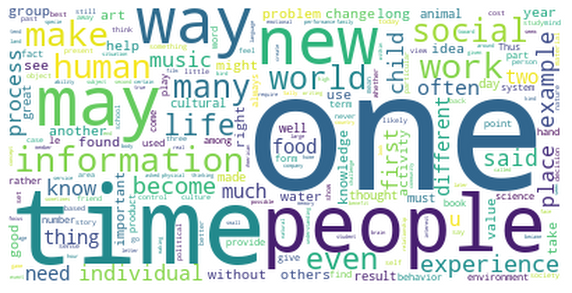

In [362]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color='white').generate(word_cloud)

plt.figure(figsize=(10,8)) #이미지 사이즈 지정
plt.imshow(wordcloud, interpolation='lanczos') #이미지의 부드럽기 정도
plt.axis('off') #x y 축 숫자 제거
plt.savefig("wordcloud.png")

In [363]:
a_s_t_name = pd.Series(all_stop_token,range(len(all_stop_token)))

In [364]:
a_s_t_name.value_counts()

The             398
one             220
people          188
time            183
In              160
               ... 
polarization      1
Cologne           1
superman          1
Drops             1
household         1
Length: 7923, dtype: int64

In [370]:
a_s_t_name.value_counts().to_csv("word_count.csv")

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


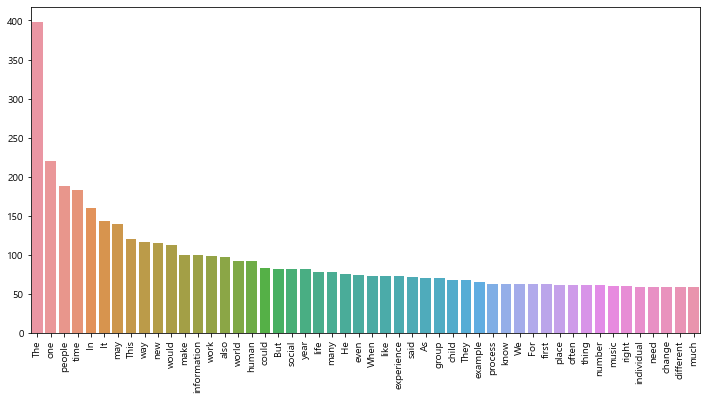

In [368]:
plt.figure(figsize=(12,6))
sns.barplot(a_s_t_name.value_counts()[:50].index,a_s_t_name.value_counts().values[:50])
plt.xticks(rotation=90)
plt.savefig("word_counts.png")